In [1]:
import sys
sys.path.append("../src/") # go to parent dir

from run_drop import *
class Args:
    #raw = '../data/test_12CH_paddlesTrigger_water_220110T2041'
    raw = '../data/test_led_32CH_10Hz_170ns_2.8V_220125T1611'
    yaml = '../yaml/config.yaml'
    start_id=0
    end_id=99999999
    
args = Args()
run=RunDROP(args)

In [2]:
run.boardId_order

array([1, 2])

In [3]:
status = run.next()
run.wfm.scipy_find_peaks()

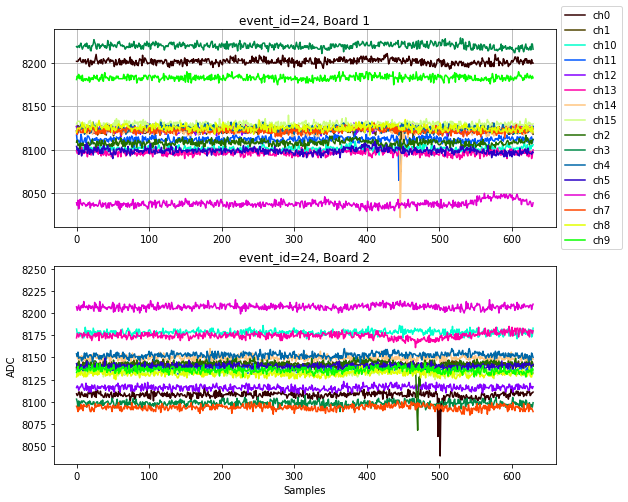

In [4]:
#%matplotlib notebook
%matplotlib inline
run.wfm.display()

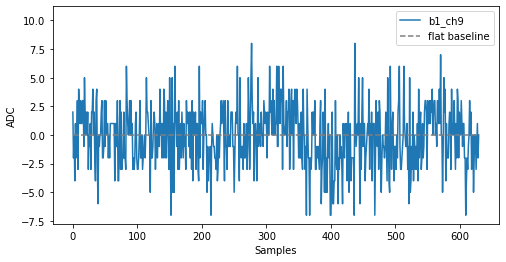

In [5]:
run.wfm.display('b1_ch9')

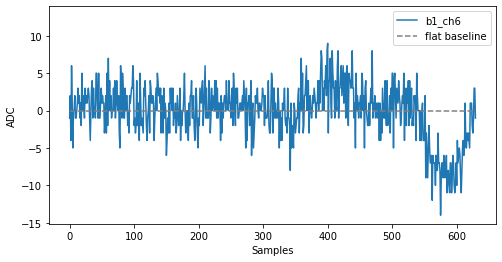

In [6]:
run.wfm.display('b1_ch6')

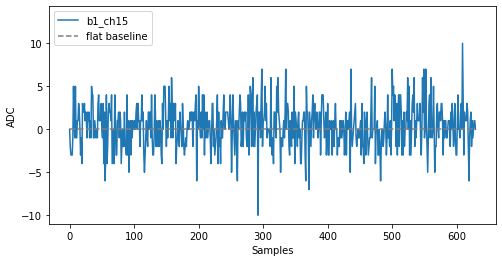

In [6]:
run.wfm.display('b1_ch15')

In [7]:
ch_list = ['b1_ch%d' % i for i in range(16)]
ch_list

['b1_ch0',
 'b1_ch1',
 'b1_ch2',
 'b1_ch3',
 'b1_ch4',
 'b1_ch5',
 'b1_ch6',
 'b1_ch7',
 'b1_ch8',
 'b1_ch9',
 'b1_ch10',
 'b1_ch11',
 'b1_ch12',
 'b1_ch13',
 'b1_ch14',
 'b1_ch15']

Info: The end of this file is reached. Close.
STOP i= 5462  event_id= 11486


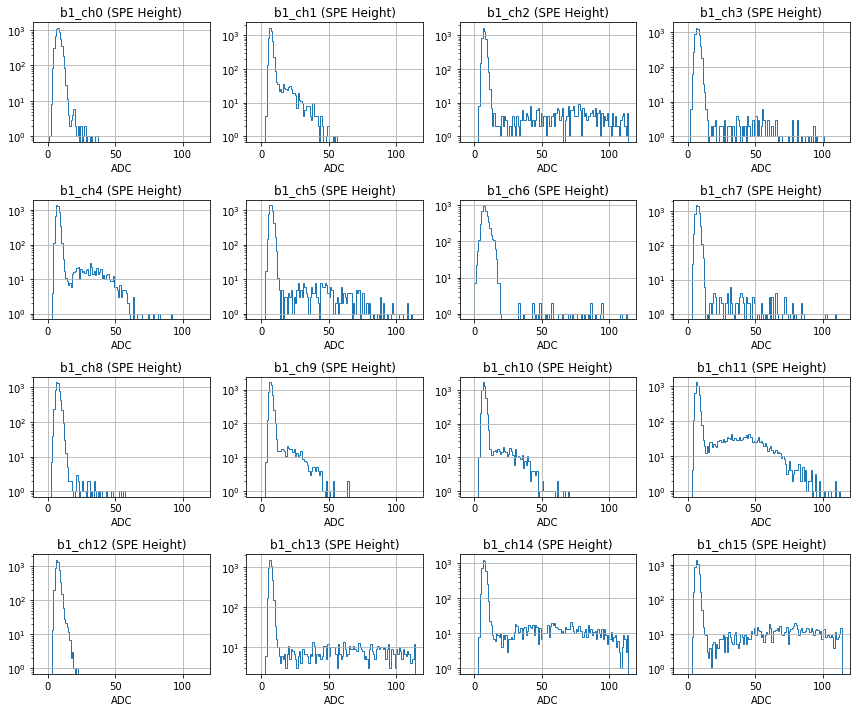

In [9]:
n_events=6000

ch_list = ['b1_ch%d' % i for i in range(16)]
#ch_list=['b1_ch6', 'b1_ch9']

heights = {}
for ch in ch_list:
    heights[ch] = []

for i in range(n_events):
    status = run.next()
    if status==RunStatus.STOP:
        print('STOP i=', i, ' event_id=', run.wfm.event_id)
        break
    if status==RunStatus.SKIP:
        print('Skip i=', i, ' event_id=', run.wfm.event_id)
        continue
    run.wfm.scipy_find_peaks()
    for ch in ch_list:
        if ch in run.wfm.amplitude:
            amp = run.wfm.amplitude[ch]
            heights[ch].append(np.max(amp[350:450]))
        else:
            print(run.wfm.event_id, ch)
            break


import matplotlib.pyplot as plt

bw=1
ncols = 4
nrows = int((len(ch_list)-0.1)/ncols)+1
plt.figure(figsize=[3*ncols,2.5*nrows])
for c, ch in enumerate(ch_list):
    plt.subplot(nrows,ncols,c+1)
    plt.hist(heights[ch], bins=np.arange(-5*bw, 115*bw, bw), histtype='step');
    plt.xlabel('ADC')
    plt.yscale('log')
    plt.title(ch+' (SPE Height)')
plt.tight_layout()

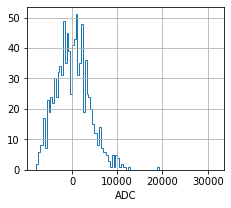

In [6]:

import matplotlib.pyplot as plt

bw=400

ncols = 3
nrows = int((len(ch_list)-0.1)/ncols)+1
plt.figure(figsize=[4*ncols,3*nrows])
for c, ch in enumerate(ch_list):
    plt.subplot(nrows,ncols,c+1)
    plt.hist(roi[ch], bins=np.arange(-20*bw, 80*bw, bw), histtype='step');
    plt.xlabel('ADC')
# plt.hist(b1ch3, bins=np.arange(0, 80*bw, bw), histtype='step');